In [1]:
import os
os.chdir(r'C:\Users\metro\DataMining\Notebook')
os.getcwd()

'C:\\Users\\metro\\DataMining\\Notebook'

In [19]:
#DATA PREPROCESSING

import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#For Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


#READING THE DATA
#SeoulBikeData = pd.read_csv('data/SeoulBikeData.csv',na_values='NA') #error 'utf-8' codec can't decode byte 0xb0 in position 12: invalid start byte
df = pd.read_csv('data/data_banknote_authentication.csv',na_values='NA')

In [20]:
df.shape

(1372, 5)

In [21]:
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,NaN,-2.27180,-0.73535,0


In [22]:
sum(df.duplicated())

23

In [23]:
df.drop_duplicates(inplace=True) #I Dropped DUPLICATES

In [24]:
#Check for missing values
df.isna().sum()

variance    68
skewness    46
curtosis     0
entropy      0
class        0
dtype: int64

In [25]:
#Percentange of missing values
missingrows = df.isna().sum()
for column in df.columns:
    print('Percentage of missing values in {} is {}'.format(column,missingrows[column]/len(df)))

Percentage of missing values in variance is 0.050407709414381024
Percentage of missing values in skewness is 0.0340993328391401
Percentage of missing values in curtosis is 0.0
Percentage of missing values in entropy is 0.0
Percentage of missing values in class is 0.0


From above we  can see variance and skewness have missing values ,which are just 5% and 3% of the total dataset which is negligable so I will drop the missing values

In [26]:
df.dropna(inplace=True)

In [27]:
#RECheck for missing values
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [29]:
#checking the value_counts to realise the data is kind of balanced
df['class'].value_counts()

0    694
1    542
Name: class, dtype: int64

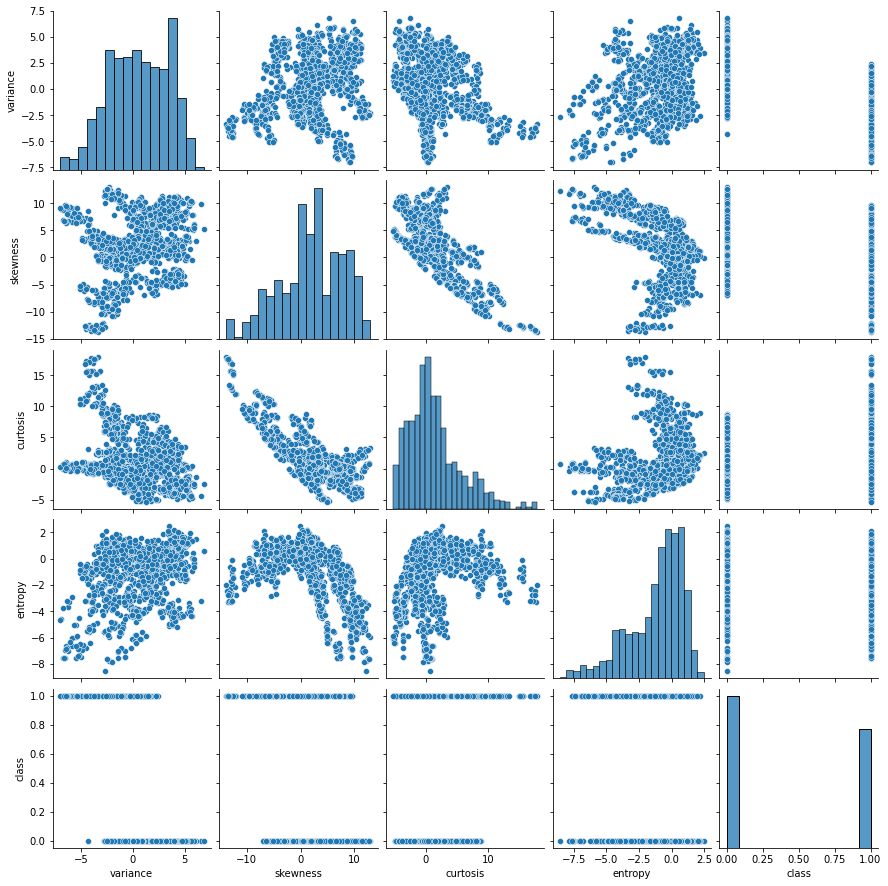

In [30]:
sns.pairplot(df)

<AxesSubplot:>

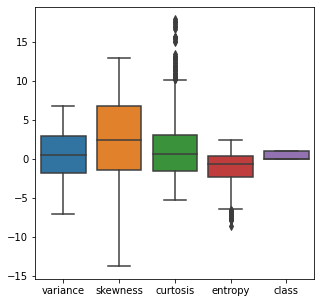

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)

In [35]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000
mean,0.515156,1.984375,1.368301,-1.171427,0.438511
std,2.856518,5.831073,4.255179,2.092623,0.496406
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.756475,-1.448475,-1.545600,-2.350075,0.000000
50%,0.572000,2.473800,0.615345,-0.591175,0.000000
75%,2.970100,6.814625,3.137925,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


column curtosis seems to have some outliers

In [44]:
#TO Remove Outliers from curtosis I am Scaling the DATA WITH ZSCORES

#STANDARDISING ALL THE COLUMNS
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [45]:
#Converted to DATAFRAME since it is easier to handle conditions on columns
df_scaled=pd.DataFrame(df_scaled)

In [46]:
df_scaled

,0,1,2,3,4
0,1.087933,1.146347,-0.981696,0.346326,-0.883731
1,1.411640,1.060787,-0.899715,-0.138960,-0.883731
2,1.173527,-0.793087,0.130693,0.610905,-0.883731
3,1.030147,1.293326,-1.264736,-1.158333,-0.883731
4,-0.065111,-1.104802,0.753152,0.087307,-0.883731
...,...,...,...,...,...
1231,-1.758010,-1.337684,2.237803,0.307378,1.131567
1232,-1.024443,0.301769,-0.416238,-0.059219,1.131567
1233,-0.038180,-0.108973,-0.662614,0.292544,1.131567
1234,-1.493841,-2.649465,3.814520,-0.767612,1.131567


In [47]:
#Column 2 is curtosis so filtering the values greater than 3 (3SDs)
df_scaled[(df_scaled[2] > 3)  ]

,0,1,2,3,4
697,-1.528162,-2.537279,3.365285,-0.052383,1.131567
748,-1.582166,-2.656208,3.834269,-1.027248,1.131567
754,-1.655186,-2.480474,3.197892,-0.103727,1.131567
804,-1.751531,-2.620351,3.747633,-0.979059,1.131567
810,-1.325351,-2.526282,3.335874,0.492216,1.131567
861,-1.363910,-2.703422,3.893091,-0.411551,1.131567
916,-1.518356,-2.580239,3.665253,-0.542015,1.131567
977,-1.280908,-2.577048,3.364086,0.243705,1.131567
1027,-1.440678,-2.683898,3.817341,-0.631651,1.131567
1032,-1.588785,-2.536576,3.350592,0.102763,1.131567


In [48]:
#REMOVING OUTLIERS FROM free sulfur dioxide(COLUMN 5) AND total sulfur dioxide(COLUMN 6)
indexNames = df_scaled[(df_scaled[2] > 3)  ].index
indexNames

Int64Index([ 697,  748,  754,  804,  810,  861,  916,  977, 1027, 1032, 1080,
            1085, 1138, 1186, 1190, 1234],
           dtype='int64')

In [49]:
#DROP THE VALUES greater than 3 Z SCORE 
df_scaled.drop(indexNames , inplace=True)


In [50]:
#TRASNFROMING BACK TO ORIGINAL VALUES(NOT  IN STANDARAD SCALE)
df_scaled=sc.inverse_transform(df_scaled)
#TAGGING THE COLUMN NAMES
df_new=pd.DataFrame(df_scaled,columns = df.columns)

In [53]:
df_new.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0.0
1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,3.86600,-2.6383,1.9242,0.10645,0.0
3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,0.32924,-4.4552,4.5718,-0.98880,0.0


<AxesSubplot:>

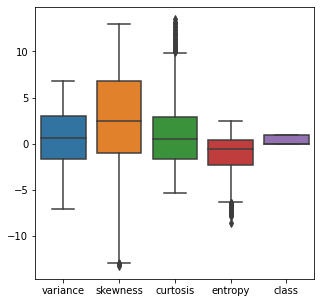

In [52]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_new)

In [63]:
df_new['class'].value_counts()

0.0    694
1.0    526
Name: class, dtype: int64

In [65]:
X = df_new.drop(['class'],axis=1)
y = df_new.loc[:,['class']]

In [66]:
#Split into training 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.20)
X_test.head()

,variance,skewness,curtosis,entropy
1145,-0.89809,-4.4862,2.200900,0.50731
991,2.01770,1.7982,-2.958100,0.20990
478,4.82780,7.7598,-2.449100,-1.22160
161,1.64260,3.0149,0.228490,-0.14700
1154,-6.42470,9.5311,0.022844,-6.85170


In [67]:
#STANDARDISNG THE VARIABLES
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) #use only training set 
                                           #to make any adjustments to the model
                                           #during training

In [69]:
import warnings
warnings.filterwarnings('ignore') #warnings form editor jupyter
#Do k-fold cross validation using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X_train_scaled,y_train,cv=5).mean() #99 PERCENT WITH IMBALANCE DATA

0.9918053375196234

In [73]:
#import Logistic Regression 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500, tol=0.001) #1.0    1088
                                                                                                    #2.0     180
                                                                                                    #0.0      63
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=500, tol=0.001)

In [74]:
#To be able to test we need to scale the test data too (X part only) 
#using the same scaler that was used to scale the training data
X_test_scaled = sc.transform(X_test)

#Predict_proba gives the probabilities P(y=Ci|x)
model.predict_proba(X_test_scaled)

array([[4.25879839e-03, 9.95741202e-01],
       [2.75453957e-01, 7.24546043e-01],
       [9.99883172e-01, 1.16827758e-04],
       [9.35217205e-01, 6.47827953e-02],
       [1.16645763e-02, 9.88335424e-01],
       [1.61771699e-02, 9.83822830e-01],
       [9.93282753e-01, 6.71724679e-03],
       [9.99817566e-01, 1.82433860e-04],
       [5.06603460e-02, 9.49339654e-01],
       [9.98543449e-01, 1.45655085e-03],
       [9.99970155e-01, 2.98450065e-05],
       [9.99228678e-01, 7.71322417e-04],
       [7.84548803e-03, 9.92154512e-01],
       [9.71976036e-01, 2.80239641e-02],
       [9.98293622e-01, 1.70637839e-03],
       [3.16314159e-02, 9.68368584e-01],
       [9.97183275e-01, 2.81672461e-03],
       [1.09358937e-03, 9.98906411e-01],
       [2.54583469e-01, 7.45416531e-01],
       [9.99183781e-01, 8.16219427e-04],
       [2.35667300e-02, 9.76433270e-01],
       [9.95053876e-01, 4.94612366e-03],
       [9.81256921e-01, 1.87430790e-02],
       [9.99424726e-01, 5.75274121e-04],
       [9.771780

In [75]:
#Whereas predict method gives the class prediction as either 0 , 1 ,2
# predict probabilities

y_predict = model.predict(X_test_scaled)
y_predict[1:10]

array([1., 0., 0., 1., 1., 0., 0., 1., 0.])

In [76]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

model.score(X_test_scaled,y_test)

0.9877049180327869

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.9877049180327869

In [80]:
#Confusion matrix corresponding prob
'''
        Predicted
        0   1  2
True  0 TP  FN FN
      1 FN  TP FN
      2 FN  FN TP
0-BAD ;1-GOOD ;2- EXCELLENT
'''
cm2 = confusion_matrix(y_test,y_predict)
cm2

array([[130,   2],
       [  1, 111]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       132
         1.0       0.98      0.99      0.99       112

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



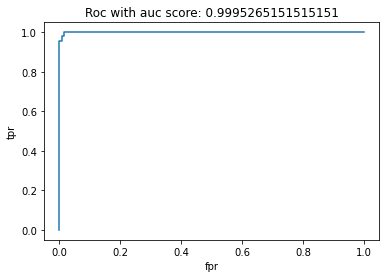

In [82]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()
